<a href="https://colab.research.google.com/github/firdausnazish7-gif/tb-xray-colab-model/blob/main/tuberculosis_with_cnn_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUBERCULOSIS DATASET


# TUBERCULOSIS WITH CNN AND TENSORFLOW

In [ ]:
#tb datset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print(tf.__version__)
print(np.__version__)
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)
print(keras.__version__)
import sklearn
print(sklearn.__version__)

2.19.0
2.0.2
3.10.0
0.13.2
2.2.2
3.10.0
1.6.1


## LOAD THE DATA

In [ ]:
# Define the path to the zip file
zip_path = "/content/gdrive/MyDrive/Colab Notebooks/chest-xray-pneumoniacovid19tuberculosis (1).zip"

# Define the path to extract the dataset
extracted_path = "/content/extracted_dataset"

# Unzip the dataset
! unzip "{zip_path}" -d "{extracted_path}"


Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: /content/extracted_dataset/train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: /content/extracted_dataset/train/NO

In [ ]:
! rm -r sample_data



##DATA PREPROCESSING


In [ ]:


# Define image size
IMG_HEIGHT = 512
IMG_WIDTH = 512
BATCH_SIZE = 32

# Create datasets for train, validation, and test sets
train_dir = extracted_path + '/train'
val_dir = extracted_path + '/val'
test_dir = extracted_path+ '/test'



train_dataset = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  labels='inferred',
  label_mode='int', # or 'categorical' depending on your model's output layer
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  interpolation='nearest', # or 'bilinear', 'bicubic'
  batch_size=BATCH_SIZE, # or any batch size you prefer
  shuffle=True # Shuffle the data for training
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  labels='inferred',
  label_mode='int', # or 'categorical' depending on your model's output layer
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  interpolation='nearest', # or 'bilinear', 'bicubic'
  batch_size=BATCH_SIZE, # or any batch size you prefer
  shuffle=False # No need to shuffle validation data
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  labels='inferred',
  label_mode='int', # or 'categorical' depending on your model's output layer
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  interpolation='nearest', # or 'bilinear', 'bicubic'
  batch_size=BATCH_SIZE, # or any batch size you prefer
  shuffle=False # No need to shuffle test data
)


print(f"Train dataset size: {tf.data.experimental.cardinality(train_dataset).numpy()} batches")
print(f"Validation dataset size: {tf.data.experimental.cardinality(val_dataset).numpy()} batches")
print(f"Test dataset size: {tf.data.experimental.cardinality(test_dataset).numpy()} batches")


# You can iterate through the dataset to see the data
# For example, to see the first batch:
for images, labels in train_dataset.take(1):
  print("Image batch shape:", images.shape)
  print("Label batch shape:", labels.shape)

Found 6326 files belonging to 4 classes.
Found 38 files belonging to 4 classes.
Found 771 files belonging to 4 classes.
Train dataset size: 198 batches
Validation dataset size: 2 batches
Test dataset size: 25 batches
Image batch shape: (32, 512, 512, 3)
Label batch shape: (32,)


In [ ]:
#find the batch size and print class_names
import tensorflow_datasets as tfds

batch_size = 32
dataset_name=extracted_path
class_names = train_dataset.class_names

print(class_names)


['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']


In [ ]:
all_train_images = []
all_train_labels = []

for images, labels in train_dataset:
  all_train_images.append(images.numpy())
  all_train_labels.append(labels.numpy())

# Concatenate the batches into single NumPy arrays
all_train_images = np.concatenate(all_train_images, axis=0)
all_train_labels = np.concatenate(all_train_labels, axis=0)

print(f"Shape of all training images: {all_train_images.shape}")
print(f"Shape of all training labels: {all_train_labels.shape}")

Shape of all training images: (6326, 512, 512, 3)
Shape of all training labels: (6326,)


In [ ]:
#do further preprocessing to increase the instances of images
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model= Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,-0.3), interpolation ='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=(0.1),width_factor=(0.1)),

    ],
    name = "model",
)

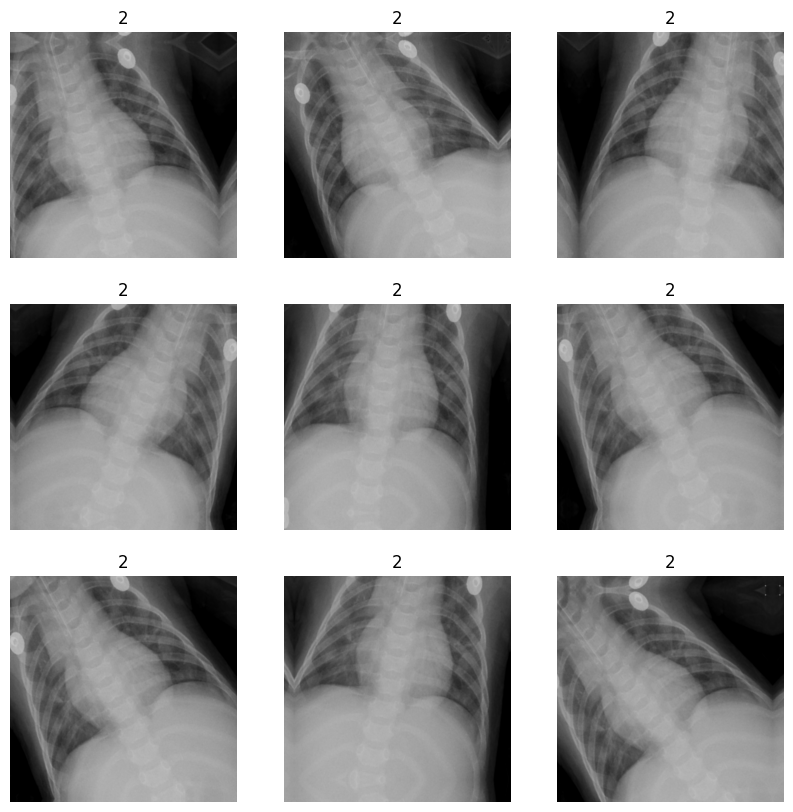

In [ ]:

import numpy as np

for images,labels in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  def f(x):
    return int(x)
  f2 = np.vectorize(f)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    model_image = model(tf.expand_dims(first_image, 0), training = True
    )
    plt.imshow(model_image[0].numpy().astype("uint8"))
    plt.title(f2(labels[0]))
    plt.axis("off")

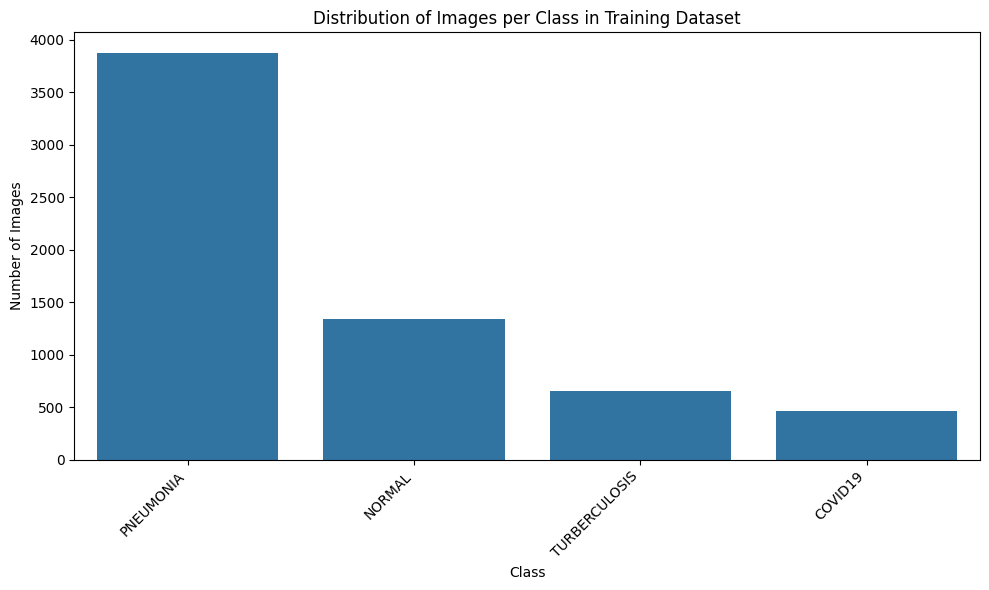

In [ ]:
#plot the data based on types of diseases
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a pandas Series for easier plotting
label_series = pd.Series(all_train_labels).map(lambda x: class_names[x])

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=label_series, order=label_series.value_counts().index)
plt.title('Distribution of Images per Class in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

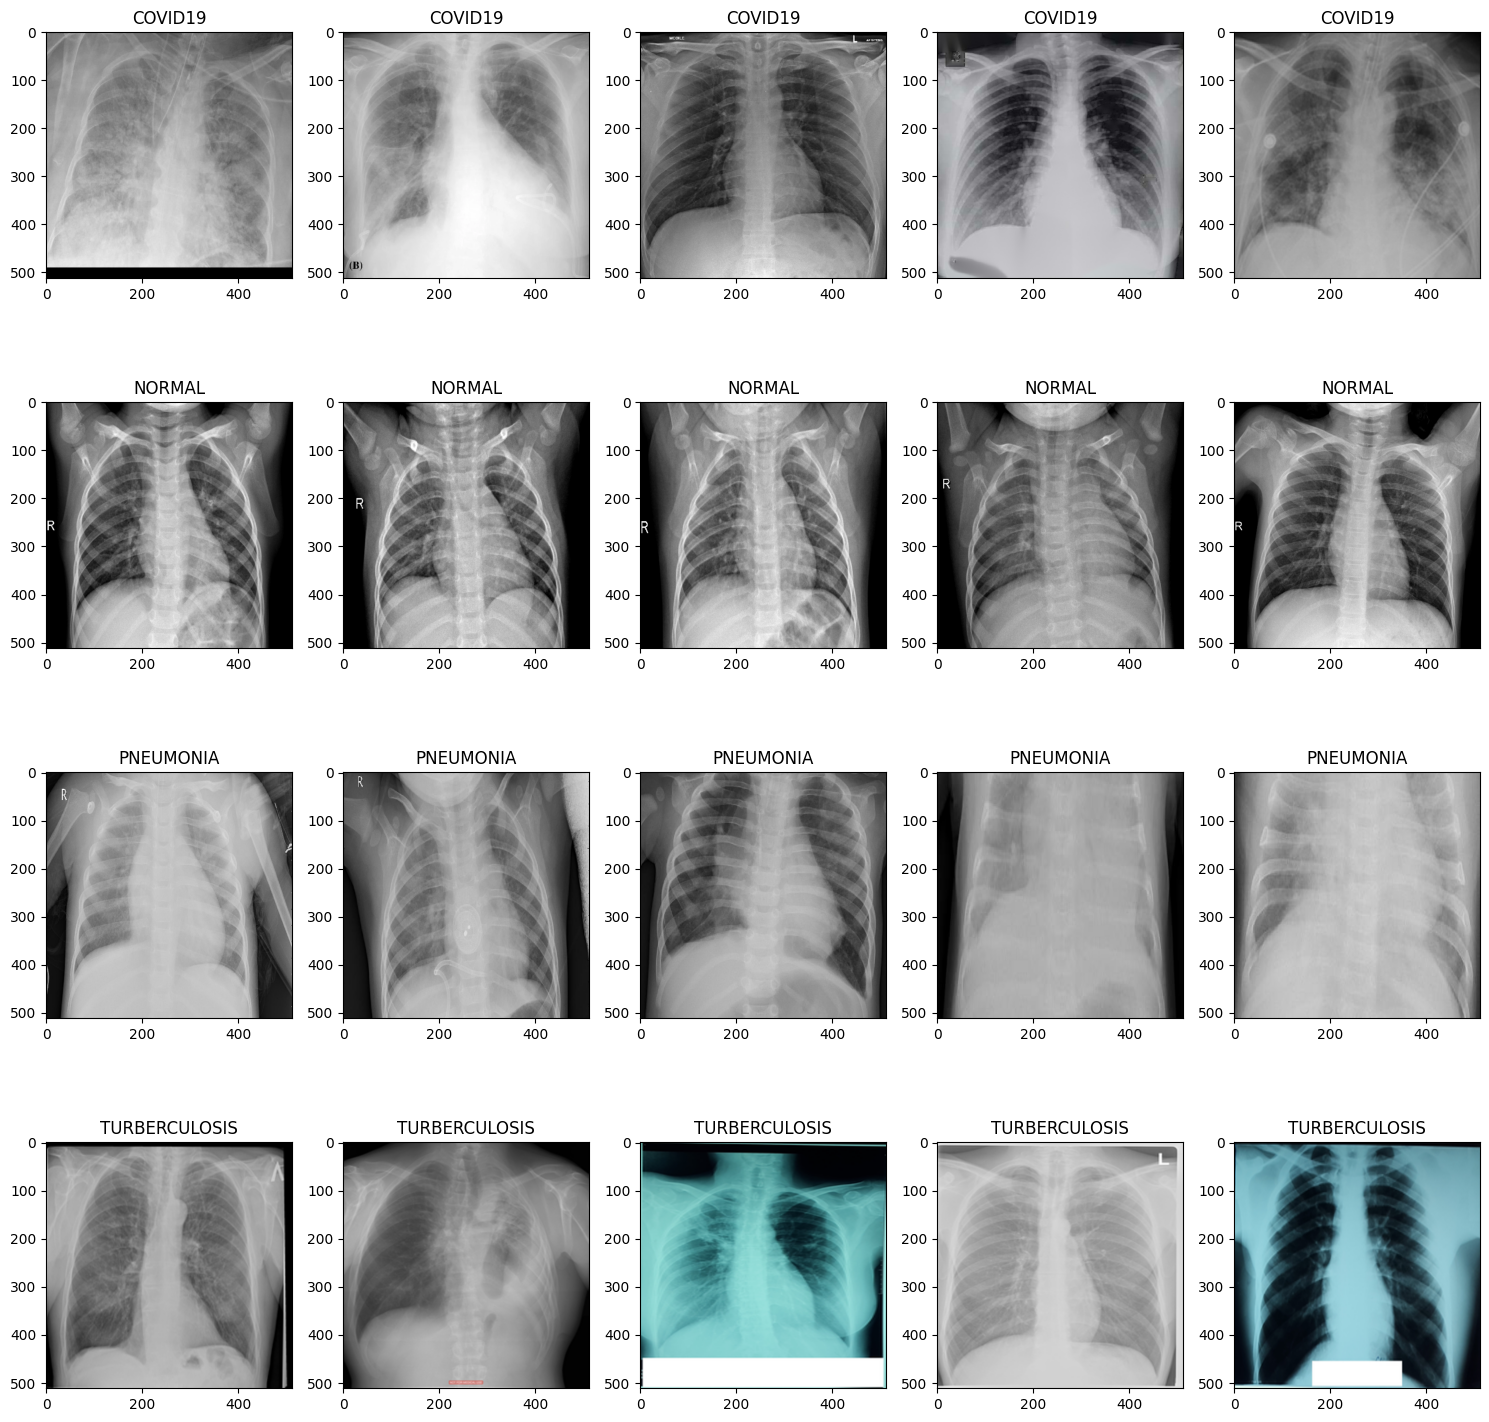

In [ ]:
#make plot of images just to have an idea
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15)) # Adjusted figure size
num_images_per_class = 5 # Display 5 images per class

for i, class_name in enumerate(class_names):
    class_index = i
    count = 0
    # Iterate through the training dataset to find and display images for the current class
    for images, labels in train_dataset:
        for j in range(images.shape[0]):
            if labels[j].numpy() == class_index:
                ax = plt.subplot(len(class_names), num_images_per_class, i * num_images_per_class + count + 1)
                plt.imshow(images[j].numpy().astype("uint8"))
                plt.title(class_name)
                plt.axis("on")
                count += 1
                if count == num_images_per_class:
                    break
        if count == num_images_per_class:
            break

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

# Get the number of classes
num_classes = len(class_names)

# One-hot encode the training labels
one_hot_train_labels = tf.keras.utils.to_categorical(all_train_labels, num_classes=num_classes)

print("Shape of one-hot encoded training labels:", one_hot_train_labels.shape)
print("First 5 one-hot encoded labels:\n", one_hot_train_labels[:5])

Shape of one-hot encoded training labels: (6326, 4)
First 5 one-hot encoded labels:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
import tensorflow as tf
#standardize your data
size=(512,512)
ds_train = train_dataset.map(lambda image, label:(tf.image.resize(image, size), label))
ds_val = val_dataset.map(lambda image, label:(tf.image.resize(image, size), label))
ds_test = test_dataset.map(lambda image, label:(tf.image.resize(image, size), label))

##OBSERVATIONS

1. We have 99 batches of train data set.
2. We have 13 batches of test data set
3. We have 1 batches of validation data set.
4. We have 4 unique diseases.
5. Pneumonia is the most common disease.
6.


In [ ]:
train_dir

'/content/extracted_dataset/train'

In [ ]:
img_height=224
img_width=224
batch_size=64

In [ ]:
import tensorflow as tf

# Define necessary variables directly within this cell
extracted_path = "/content/extracted_dataset" # From cell f37b9c83
train_dir = extracted_path + '/train'        # From cell f37b9c83
img_height = 224                             # From cell 9XH3wzGOlYlV
img_width = 224                              # From cell 9XH3wzGOlYlV
batch_size = 64                              # From cell 9XH3wzGOlYlV

train_dataset = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  labels='inferred',
  label_mode='int',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True
)

Found 6326 files belonging to 4 classes.


In [ ]:
import tensorflow as tf

# Define necessary variables directly within this cell
extracted_path = "/content/extracted_dataset" # From cell f37b9c83
val_dir = extracted_path + '/val'            # From cell f37b9c83
img_height = 224                             # From cell 9XH3wzGOlYlV
img_width = 224                              # From cell 9XH3wzGOlYlV
batch_size = 64                              # From cell 9XH3wzGOlYlV

val_dataset = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  labels='inferred',
  label_mode='int',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False
)

Found 38 files belonging to 4 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']


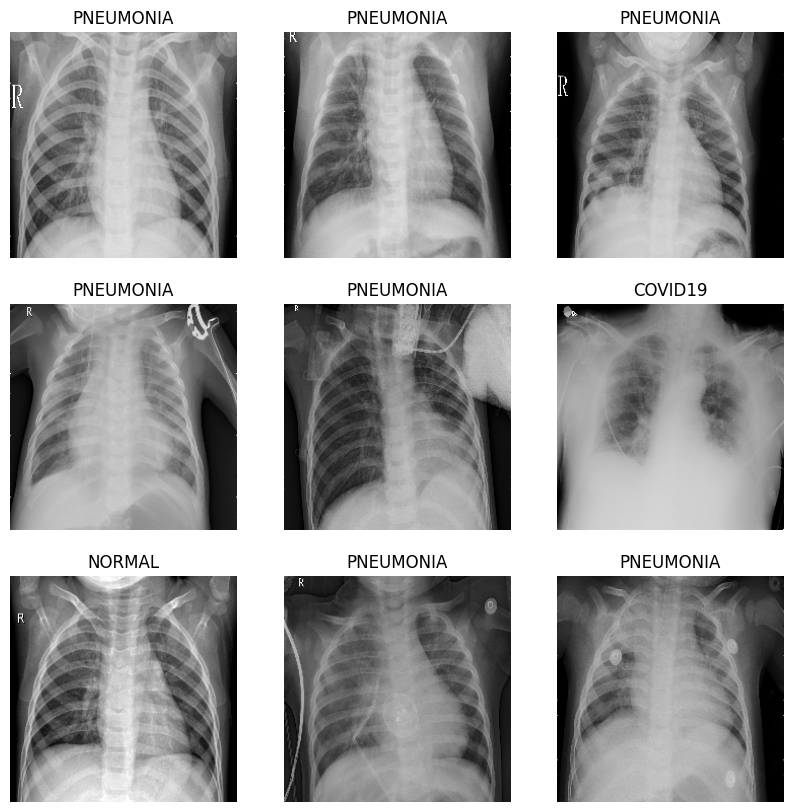

In [ ]:
#display first 9 images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
normalisation_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_train_ds = train_dataset.map(lambda x, y: (normalisation_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
import tensorflow as tf

# Define necessary variables directly within this cell
extracted_path = "/content/extracted_dataset" # From cell f37b9c83
test_dir = extracted_path+ '/test'           # From cell f37b9c83
img_height = 224                             # From cell 9XH3wzGOlYlV
img_width = 224                              # From cell 9XH3wzGOlYlV
batch_size = 64                              # From cell 9XH3wzGOlYlV

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size = batch_size,
  shuffle=False)

normalized_val_ds = val_dataset.map(lambda x, y: (normalisation_layer(x), y))
normalized_test_ds = test_dataset.map(lambda x, y: (normalisation_layer(x), y))

Found 771 files belonging to 4 classes.


In [ ]:
import tensorflow as tf

# Get the number of classes (ensure num_classes is defined or derived)
# Assuming class_names is available from a previous cell, if not, re-define here.
# For robustness, we'll re-derive num_classes here.
num_classes = len(class_names) if 'class_names' in locals() else 4 # Fallback if not defined

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# (X_train, y_train)= train_dataset # This line caused an error and is not needed. Datasets are iterated, not unpacked.

In [ ]:
#compile the model


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [31]:
#train the model
history = model.fit(normalized_train_ds,epochs=10,validation_data=normalized_val_ds)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 55s 460ms/step - accuracy: 0.5974 - loss: 1.1128 - val_accuracy: 0.3684 - val_loss: 1.3793
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 70s 419ms/step - accuracy: 0.7813 - loss: 0.5322 - val_accuracy: 0.7895 - val_loss: 0.5895
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.8931 - loss: 0.3073 - val_accuracy: 0.7368 - val_loss: 0.8326
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 82s 422ms/step - accuracy: 0.9058 - loss: 0.2550 - val_accuracy: 0.7895 - val_loss: 0.5579
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 45s 452ms/step - accuracy: 0.9142 - loss: 0.2346 - val_accuracy: 0.7368 - val_loss: 0.7059
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.9291 - loss: 0.1944 - val_accuracy: 0.6579 - val_loss: 0.8500
Epoch 7/10
74/99 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - accuracy: 0.9318 - loss: 0.1787

KeyboardInterrupt: 

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#Define call back fuction
early_stopping=EarlyStopping(patience=2)
history = model.fit(normalized_train_ds,
          validation_data = normalized_val_ds,
          epochs=10,
          callbacks=[early_stopping])
#evaluating the model
loss = model.evaluate(normalized_test_ds, verbose=0)
print(f"Test loss: {loss}")

#plot the accuracy of training and validation

#plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # Plot validation loss as well
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') # Corrected legend
plt.show()

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Plot validation accuracy as well
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right') # Corrected legend
plt.show()

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(normalized_test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

##SAVING THE MODEL

In [33]:
!mkdir models_saved


In [34]:

#save the model to use later
model.save('models_saved/tuberculosis_cnn.keras')

In [35]:
# Create a directory to save the model if it doesn't exist
import os
save_dir = 'models_saved'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model
model.save(os.path.join(save_dir, 'tuberculosis_cnn.keras'))

print(f"Model saved to {os.path.join(save_dir, 'tuberculosis_cnn.keras')}")

Model saved to models_saved/tuberculosis_cnn.keras


##Predicting the image

Using image for prediction: /content/extracted_dataset/test/TURBERCULOSIS/Tuberculosis-664.png


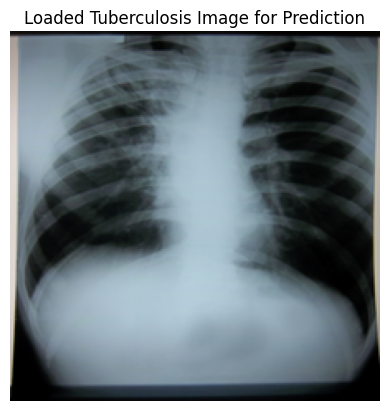

Shape of the loaded Tuberculosis image: (1, 224, 224, 3)
Model loaded successfully from models_saved/tuberculosis_cnn.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
Full probability distribution: [[2.2494888e-02 7.0095234e-07 1.8052681e-03 9.7569919e-01]]
The model predicts this image belongs to the class: TURBERCULOSIS


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory for Tuberculosis test images
tb_test_dir = '/content/extracted_dataset/test/TURBERCULOSIS/'

# Define the image size your model expects (IMG_HEIGHT and IMG_WIDTH were 224 in training context)
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Re-define class_names for robustness if not already in scope
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

def load_and_preprocess_image(img_path):
    # Read the image file
    img = tf.io.read_file(img_path)
    # Decode the image (handles different image formats)
    img = tf.image.decode_image(img, channels=3)
    # Convert to float32
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # Add a batch dimension
    img = tf.expand_dims(img, axis=0)
    return img

# Dynamically find an image file in the Tuberculosis test directory
image_path = None
if os.path.exists(tb_test_dir):
    for filename in os.listdir(tb_test_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(tb_test_dir, filename)
            break

if image_path:
    print(f"Using image for prediction: {image_path}")
    # Load and preprocess the selected Tuberculosis image
    single_tuberculosis_image = load_and_preprocess_image(image_path)

    # Display the loaded and preprocessed image (optional)
    plt.imshow(tf.squeeze(single_tuberculosis_image).numpy())
    plt.title("Loaded Tuberculosis Image for Prediction")
    plt.axis("off")
    plt.show()

    print("Shape of the loaded Tuberculosis image:", single_tuberculosis_image.shape)

    # Load the trained model. Assuming it was saved as 'tuberculosis_cnn.keras'
    # If the model is not found, an error will be raised.
    model_path = 'models_saved/tuberculosis_cnn.keras'
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"Model loaded successfully from {model_path}")

        # Make a prediction on the single preprocessed Tuberculosis image
        prediction = model.predict(single_tuberculosis_image)

        # Get the predicted class index (the index with the highest probability)
        predicted_class_index = np.argmax(prediction)

        # Print the full probability distribution
        print("Full probability distribution:", prediction)

        # Print the predicted class name
        print(f"The model predicts this image belongs to the class: {class_names[predicted_class_index]}")

    except Exception as e:
        print(f"Error loading or predicting with the model: {e}")
        print("Please ensure the model is saved at the specified path and is compatible.")

else:
    print(f"No image files found in {tb_test_dir}. Please ensure the directory exists and contains image files.")

The code above uses the re-trained model to predict the class of the provided Tuberculosis image. It outputs the probability distribution across all classes and highlights the class with the highest probability as the model's prediction.

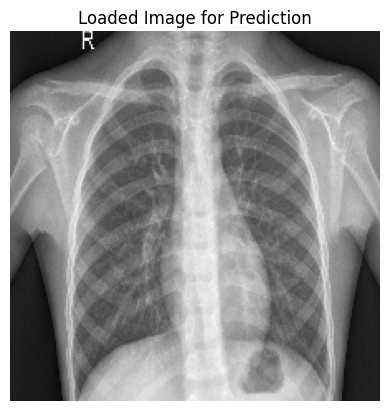

Shape of the loaded image: (1, 224, 224, 3)


In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Replace with the actual path to your image file
image_path = '/content/extracted_dataset/test/NORMAL/IM-0001-0001.jpeg' # Example path

# Define the image size your model expects (assuming 224x224 based on previous cells)
IMG_HEIGHT = 224
IMG_WIDTH = 224

def load_and_preprocess_image(img_path):
    # Read the image file
    img = tf.io.read_file(img_path)
    # Decode the image (handles different image formats)
    img = tf.image.decode_image(img, channels=3)
    # Convert to float32
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # Add a batch dimension
    img = tf.expand_dims(img, axis=0)
    return img

# Load and preprocess the single image
single_image = load_and_preprocess_image(image_path)

# Display the loaded and preprocessed image (optional)
plt.imshow(tf.squeeze(single_image).numpy())
plt.title("Loaded Image for Prediction")
plt.axis("off")
plt.show()

print("Shape of the loaded image:", single_image.shape)

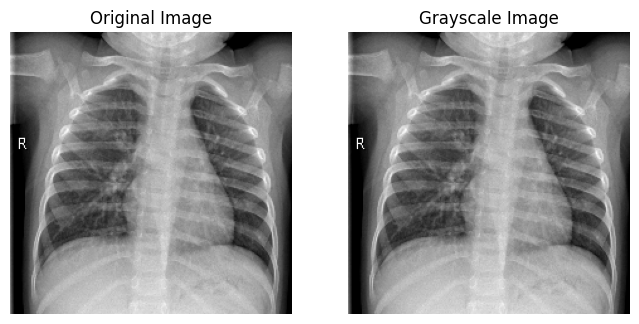

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Take a batch of images from the training dataset
for images, labels in train_dataset.take(1):
    # Convert the images to grayscale
    grayscale_images = tf.image.rgb_to_grayscale(images)

    # Display an original and grayscale image side by side
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(grayscale_images[0]).numpy().astype("uint8"), cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.show()
    break # Display only one batch

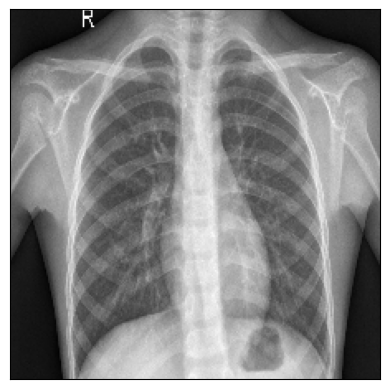

In [39]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Remove the batch dimension and convert to grayscale for displaying
display_image = tf.squeeze(single_image)
grayscale_display_image = tf.image.rgb_to_grayscale(display_image)

plt.imshow(grayscale_display_image.numpy(), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [40]:
#predict the image
prediction = model.predict(single_image)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.04337489 0.5705085  0.13628796 0.24982868]]


In [41]:
print(prediction[:,1])#of index 1

[0.5705085]


In [42]:
# Get the predicted class index (the index with the highest probability)
predicted_class_index = prediction.argmax()

# Assuming you have the class_names list defined

# Example: class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

print(f"The model predicts that this image is a {class_names[predicted_class_index]}.")

The model predicts that this image is a NORMAL.


The above code will calculate and display the precision, along with recall and F1-score for each class, providing a detailed performance overview of your model on the test dataset.

In [43]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels from the normalized_test_ds
true_labels = np.concatenate([y for x, y in normalized_test_ds], axis=0)

# Get predictions from the model on the normalized_test_ds
predictions = model.predict(normalized_test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Generate a classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)

# Print the overall precision and the full classification report
overall_precision = report['weighted avg']['precision']
print(f"Overall Precision: {overall_precision:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_names))


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step
Overall Precision: 0.8161

Classification Report:
               precision    recall  f1-score   support

      COVID19       0.94      0.86      0.90       106
       NORMAL       0.81      0.58      0.68       234
    PNEUMONIA       0.80      0.93      0.86       390
TURBERCULOSIS       0.64      0.85      0.73        41

     accuracy                           0.81       771
    macro avg       0.80      0.81      0.79       771
 weighted avg       0.82      0.81      0.80       771



### Incorporate Data Augmentation into the Model



In [ ]:
import tensorflow as tf

# Define the augmentation model with simpler parameters
augmentation_layers = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        # Removed RandomZoom, RandomContrast, RandomTranslation for now
    ],
    name = "data_augmentation",
)

# Get the number of classes (ensure num_classes is defined or derived)
num_classes = len(class_names) # Assuming class_names is already defined

# Re-define the model to include data augmentation as the first layer
model_with_augmentation = tf.keras.Sequential([
    augmentation_layers, # Add augmentation layers here
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # Rescaling now also defines input_shape
    tf.keras.layers.Conv2D(16, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_with_augmentation.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the new model with augmentation
model_with_augmentation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model with augmentation
history_aug = model_with_augmentation.fit(normalized_train_ds,
          epochs=10, # You might want to experiment with more epochs
          validation_data=normalized_val_ds,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]) # Increased patience for early stopping

Epoch 1/10
59/99 ━━━━━━━━━━━━━━━━━━━━ 17s 427ms/step - accuracy: 0.8809 - loss: 0.3296

### Calculate Class Weights to Address Imbalance

To combat the class imbalance, we will calculate class weights. This will assign a higher penalty to misclassifications of underrepresented classes during training, encouraging the model to learn their features more effectively.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming all_train_labels is already available from cell 01327374
# and class_names from _PmFVyfRoZGd or nZJwzpKuloPi

# Calculate class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_train_labels),
    y=all_train_labels
)

# Convert to a dictionary for Keras fit method
class_weights_dict = dict(enumerate(class_weights_array))

print("Calculated Class Weights:", class_weights_dict)

In [ ]:
# Compile the new model with augmentation
model_with_augmentation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model with augmentation and class weights
history_aug = model_with_augmentation.fit(normalized_train_ds,
          epochs=10, # You might want to experiment with more epochs
          validation_data=normalized_val_ds,
          class_weight=class_weights_dict, # Add class weights here
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]) # Increased patience for early stopping

## Implement Transfer Learning with MobileNetV2

In [ ]:
import tensorflow as tf

# 1. Load the pre-trained MobileNetV2 model
# Exclude the top classification layer (include_top=False)
# and specify the input shape
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3) # Re-using IMG_HEIGHT and IMG_WIDTH from previous cells

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# 2. Freeze the base model layers
base_model.trainable = False

# 3. Create the new classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer_1 = tf.keras.layers.Dense(128, activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.25) # Re-using dropout for regularization
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax') # num_classes from previous cells

# 4. Build the complete model with the base and the new head
model_transfer_learning = tf.keras.Sequential([
    base_model,
    global_average_layer,
    dense_layer_1,
    dropout_layer,
    prediction_layer
])

model_transfer_learning.summary()

Now that the transfer learning model is defined, we need to compile and train it. We will use the same compilation parameters and data (normalized_train_ds, normalized_val_ds) as before, and include the `class_weights_dict` to continue addressing class imbalance. We'll also use EarlyStopping to prevent overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the transfer learning model
model_transfer_learning.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Often good to use a smaller learning rate for fine-tuning
                                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                                metrics=['accuracy'])

# Train the transfer learning model
history_transfer = model_transfer_learning.fit(normalized_train_ds,
                                              epochs=15, # Increased epochs as transfer learning might need more
                                              validation_data=normalized_val_ds,
                                              class_weight=class_weights_dict,
                                              callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

After training the transfer learning model, let's plot its learning curves and evaluate its performance on the test set, specifically checking the metrics for 'TURBERCULOSIS'.

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss for the transfer learning model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plotting the training and validation accuracy for the transfer learning model
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the transfer learning model on the test dataset
loss_transfer, acc_transfer = model_transfer_learning.evaluate(normalized_test_ds)
print(f"Test Loss (Transfer Learning): {loss_transfer:.4f}")
print(f"Test Accuracy (Transfer Learning): {acc_transfer:.4f}")

# Get true labels from the normalized_test_ds
true_labels_test = np.concatenate([y for x, y in normalized_test_ds], axis=0)

# Get predictions from the transfer learning model on the normalized_test_ds
predictions_transfer = model_transfer_learning.predict(normalized_test_ds)
predicted_classes_transfer = np.argmax(predictions_transfer, axis=1)

# Generate and print a classification report for the transfer learning model
report_transfer = classification_report(true_labels_test, predicted_classes_transfer, target_names=class_names, output_dict=True)

print("\nClassification Report (Transfer Learning):")
print(classification_report(true_labels_test, predicted_classes_transfer, target_names=class_names))

Let's review these new results to see if transfer learning has improved the detection of Tuberculosis.

Now that class weights are applied, re-run the subsequent cells to plot the training history and evaluate the model's performance with the updated weighting strategy.

After retraining, you can evaluate the `model_with_augmentation` and check the classification report again. If the precision for 'TURBERCULOSIS' is still a concern, we can then explore class weighting or transfer learning.

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and testing loss for the augmented model
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model Loss (with Augmentation)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy for the augmented model
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('Model Accuracy (with Augmentation)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [45]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the augmented model on the test dataset
loss_aug, acc_aug = model_with_augmentation.evaluate(normalized_test_ds)
print(f"Test Loss (with augmentation): {loss_aug:.4f}")
print(f"Test Accuracy (with augmentation): {acc_aug:.4f}")

# Get true labels from the normalized_test_ds
true_labels_aug = np.concatenate([y for x, y in normalized_test_ds], axis=0)

# Get predictions from the augmented model on the normalized_test_ds
predictions_aug = model_with_augmentation.predict(normalized_test_ds)
predicted_classes_aug = np.argmax(predictions_aug, axis=1)

# Generate and print a classification report for the augmented model
report_aug = classification_report(true_labels_aug, predicted_classes_aug, target_names=class_names, output_dict=True)

print("\nClassification Report (with Augmentation):")
print(classification_report(true_labels_aug, predicted_classes_aug, target_names=class_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.6822 - loss: 0.8386
Test Loss (with augmentation): 0.6308
Test Accuracy (with augmentation): 0.7613
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step

Classification Report (with Augmentation):
               precision    recall  f1-score   support

      COVID19       0.88      0.76      0.82       106
       NORMAL       0.86      0.43      0.57       234
    PNEUMONIA       0.76      0.96      0.84       390
TURBERCULOSIS       0.47      0.78      0.59        41

     accuracy                           0.76       771
    macro avg       0.74      0.73      0.71       771
 weighted avg       0.79      0.76      0.75       771



## Summarize Test Metrics

### Subtask:
Provide a concise summary of the overall precision and the precision, recall, and F1-score for each class from the classification report generated previously.


In [44]:
print("### Test Metrics Summary ###")
print(f"Overall Precision (weighted average): {report['weighted avg']['precision']:.4f}")

for class_name in class_names:
    print(f"\n--- Class: {class_name} ---")
    print(f"  Precision: {report[class_name]['precision']:.4f}")
    print(f"  Recall: {report[class_name]['recall']:.4f}")
    print(f"  F1-Score: {report[class_name]['f1-score']:.4f}")


### Test Metrics Summary ###
Overall Precision (weighted average): 0.8161

--- Class: COVID19 ---
  Precision: 0.9381
  Recall: 0.8585
  F1-Score: 0.8966

--- Class: NORMAL ---
  Precision: 0.8133
  Recall: 0.5769
  F1-Score: 0.6750

--- Class: PNEUMONIA ---
  Precision: 0.8035
  Recall: 0.9333
  F1-Score: 0.8636

--- Class: TURBERCULOSIS ---
  Precision: 0.6364
  Recall: 0.8537
  F1-Score: 0.7292


**Reasoning**:
The subtask requires summarizing the metrics from the previously generated classification report. I will extract the overall precision and the precision, recall, and F1-score for each class from the `report` dictionary and present them.



In [46]:
!git clone https://github.com/firdausnazish7-gif/tb-xray-colab-model

Cloning into 'tb-xray-colab-model'...


In [50]:
%cd tb-xray-colab-model

/content/tb-xray-colab-model


In [60]:
!git config --global user.email "firdausnazish7@gmail.com"
!git config --global user.name "Nazish Firdaus"

In [64]:
# Replace 'your_notebook_name.ipynb' with the actual filename of this notebook.
# You can find the notebook's name in the Colab tab title.
# For example, if your notebook is named 'TB_CNN_Model.ipynb', use that.

# Assuming your notebook is named 'tuberculosis_with_cnn_and_tensorflow.ipynb' (based on the notebook's title)
# Please verify the exact filename in your '/content/tb-xray-colab-model/' directory.

# !!! IMPORTANT: Replace the filename below with the actual, correct filename of your notebook !!!
!git add "tuberculosis_with_cnn_and_tensorflow.ipynb" # <--- CHANGE THIS FILENAME IF IT'S INCORRECT
!git commit -m "Add tuberculosis notebook"
!git push -u origin main

fatal: pathspec 'tuberculosis_with_cnn_and_tensorflow.ipynb' did not match any files
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/firdausnazish7-gif/tb-xray-colab-model'


In [61]:
# Ensure your notebook is saved in the '/content/tb-xray-colab-model/' directory first!

!git add .
!git commit -m "Add Colab notebook"
# Use '-u' for the first push to an empty remote repository to set the upstream branch
!git push -u origin main # Or 'master' if your default branch is master

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/firdausnazish7-gif/tb-xray-colab-model'


##SAVE IN .H5 Format


In [ ]:
import tensorflow as tf
import os

# Define the path where your .keras model is saved
keras_model_path = 'models_saved/tuberculosis_cnn.keras'

# Load the .keras model
try:
    model = tf.keras.models.load_model(keras_model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading .keras model: {e}")
    # Exit if model cannot be loaded
    exit()

# Define the directory to save the model in SavedModel format
saved_model_dir = 'models_saved/tuberculosis_cnn_savedmodel'

# Create the directory if it doesn't exist
if not os.path.exists(saved_model_dir):
    os.makedirs(saved_model_dir)

# Save the model in SavedModel format (as previously done)
try:
    tf.saved_model.save(model, saved_model_dir)
    print(f"Model successfully saved to SavedModel format at: {saved_model_dir}")
except Exception as e:
    print(f"Error saving model to SavedModel format: {e}")

# Define the path for the .h5 model
h5_model_path = 'models_saved/tuberculosis_cnn.h5'

# Save the model in .h5 format
try:
    model.save(h5_model_path)
    print(f"Model successfully saved to .h5 format at: {h5_model_path}")
except Exception as e:
    print(f"Error saving model to .h5 format: {e}")
